### Závěrečný projet - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
- Druhou část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
3. Datová analýza - analýza dat
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [67]:
from bs4 import BeautifulSoup
import requests

strana = 1

byty = []


while True:
    mesto = 'zlin'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    
    # Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`

    ##############################################################################################################################

    seznam_nabidek = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')

    for nabidka in seznam_nabidek:
        id = nabidka['id']
        if 'estate' in id or 'region' in id:
            nabidka_href = nabidka.find('a', 'MuiTypography-root MuiTypography-inherit MuiLink-root MuiLink-underlineAlways css-1c7vz4z')['href']
            #print(nabidka_href)
            rozmery = nabidka.find('p', 'MuiTypography-root MuiTypography-body1 css-13ztabn').text.replace('\xa0', '')
            rozmery = rozmery.replace('SLEVA: ', '')
            #rozmery = rozmery.replace('atypický ', '0 ')
            rozmery = rozmery.replace('pokoje ', 'pokoj ')
            #print(rozmery)
            lokace = nabidka.findAll('p', 'MuiTypography-root MuiTypography-body1 css-13ztabn')[1].text
            lokace_rozdelena = lokace.split(',')
            if len(lokace_rozdelena) == 2:
                ulice = lokace_rozdelena[0]
                mesto = lokace_rozdelena[1]
            else:
                ulice = 'NaN'
                mesto = lokace_rozdelena[0]
            #print(lokace)
            cena = nabidka.find('p', 'MuiTypography-root MuiTypography-body1 css-1ndcg2e').text.replace('\xa0', '')
            #print(cena)

            objekt_byt = {
                'URL odkaz': 'https://www.sreality.cz' + nabidka_href,
                'Dispozice': rozmery,
                'Lokace': lokace,
                'Ulice': ulice,
                'Mesto': mesto,
                'Cena za mesic' : cena
            }

            byty.append(objekt_byt)

    ##############################################################################################################################
    


    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text

    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

print(byty)
print(len(byty))

Scrapuju stránku č. 2
Scrapuju stránku č. 3
Scrapuju stránku č. 4
Scrapuju stránku č. 5
Scrapuju stránku č. 6
Scrapuju stránku č. 7
Scrapuju stránku č. 8
Již zde není žádná další strana. Končím
[{'URL odkaz': 'https://www.sreality.cz/detail/pronajem/byt/1+kk/zlin-zlin-sadova/670573132', 'Dispozice': 'Pronájem bytu 1+kk 40m²', 'Lokace': 'Sadová, Zlín', 'Ulice': 'Sadová', 'Mesto': ' Zlín', 'Cena za mesic': '13500Kč/měsíc'}, {'URL odkaz': 'https://www.sreality.cz/detail/pronajem/byt/1+1/zlin-zlin-podlesi-v/2323300940', 'Dispozice': 'Pronájem bytu 1+1 36m²', 'Lokace': 'Podlesí V, Zlín', 'Ulice': 'Podlesí V', 'Mesto': ' Zlín', 'Cena za mesic': '11500Kč/měsíc'}, {'URL odkaz': 'https://www.sreality.cz/detail/pronajem/byt/1+kk/zlin-malenovice-tecovska/1112744524', 'Dispozice': 'Pronájem bytu 1+kk 26m²', 'Lokace': 'Tečovská, Zlín - Malenovice', 'Ulice': 'Tečovská', 'Mesto': ' Zlín - Malenovice', 'Cena za mesic': '8300Kč/měsíc'}, {'URL odkaz': 'https://www.sreality.cz/detail/pronajem/byt/1+kk/zl

### Datová analýza

In [68]:
import pandas as pd

df = pd.DataFrame(byty)
df.head()

,URL odkaz,Dispozice,Lokace,Ulice,Mesto,Cena za mesic
0,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 40m²,"Sadová, Zlín",Sadová,Zlín,13500Kč/měsíc
1,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+1 36m²,"Podlesí V, Zlín",Podlesí V,Zlín,11500Kč/měsíc
2,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 26m²,"Tečovská, Zlín - Malenovice",Tečovská,Zlín - Malenovice,8300Kč/měsíc
3,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 31m²,"J. A. Bati, Zlín",J. A. Bati,Zlín,Cena na vyžádání
4,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 65m²,"Lorencova, Zlín",Lorencova,Zlín,18700Kč/měsíc


In [97]:
df['Rozmery'] = df['Dispozice'].str.split(' ').str[3]
df['Rozmery'].head()

0    40m²
1    36m²
2    26m²
4    65m²
5    56m²
Name: Rozmery, dtype: object

In [98]:
df['Kompozice'] = df['Dispozice'].str.split(' ').str[2]
df['Kompozice'].head()

0    1+kk
1     1+1
2    1+kk
4    2+kk
5     2+1
Name: Kompozice, dtype: object

In [99]:
df['Cena'] = df['Cena za mesic'].str.replace('Kč/měsíc', '')
df['Cena'].head()

0    13500
1    11500
2     8300
4    18700
5    12000
Name: Cena, dtype: object

In [100]:
df['Rozmer bez jednotek'] = df['Rozmery'].str.replace('m²', '')
df['Rozmer bez jednotek'].head()

0    40
1    36
2    26
4    65
5    56
Name: Rozmer bez jednotek, dtype: object

In [74]:
#URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)

df = df[['URL odkaz', 'Dispozice', 'Rozmery', 'Rozmer bez jednotek', 'Kompozice', 'Lokace', 'Ulice', 'Mesto', 'Cena za mesic', 'Cena']]

In [76]:
df.head()

,URL odkaz,Dispozice,Rozmery,Rozmer bez jednotek,Kompozice,Lokace,Ulice,Mesto,Cena za mesic,Cena
0,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 40m²,40m²,40,1+kk,"Sadová, Zlín",Sadová,Zlín,13500Kč/měsíc,13500
1,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+1 36m²,36m²,36,1+1,"Podlesí V, Zlín",Podlesí V,Zlín,11500Kč/měsíc,11500
2,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 26m²,26m²,26,1+kk,"Tečovská, Zlín - Malenovice",Tečovská,Zlín - Malenovice,8300Kč/měsíc,8300
3,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 31m²,31m²,31,1+kk,"J. A. Bati, Zlín",J. A. Bati,Zlín,Cena na vyžádání,Cena na vyžádání
4,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 65m²,65m²,65,2+kk,"Lorencova, Zlín",Lorencova,Zlín,18700Kč/měsíc,18700


In [77]:
df['Dispozice'].unique()

array(['Pronájem bytu 1+kk 40m²', 'Pronájem bytu 1+1 36m²',
       'Pronájem bytu 1+kk 26m²', 'Pronájem bytu 1+kk 31m²',
       'Pronájem bytu 2+kk 65m²', 'Pronájem bytu 2+1 56m²',
       'Pronájem bytu 1+1 25m²', 'Pronájem bytu 1+kk 21m²',
       'Pronájem bytu 3+1 68m²', 'Pronájem bytu 2+kk 96m²',
       'Pronájem bytu 1+kk 41m²', 'Pronájem bytu 1+1 34m²',
       'Pronájem bytu 2+1 48m²', 'Pronájem bytu 2+1 58m²',
       'Pronájem bytu 3+1 64m²', 'Pronájem bytu 2+1 55m²',
       'Pronájem bytu 3+1 96m²', 'Pronájem bytu 3+1 115m²',
       'Pronájem bytu 2+kk 57m²', 'Pronájem bytu 2+kk 64m²',
       'Pronájem bytu 2+kk 85m²', 'Pronájem bytu 1+kk 37m²',
       'Pronájem bytu 2+kk 60m²', 'Pronájem bytu 2+1 44m²',
       'Pronájem bytu 1+kk 32m²', 'Pronájem bytu 2+1 68m²',
       'Pronájem bytu 1+1 33m²', 'Pronájem bytu 2+1 57m²',
       'Pronájem bytu 2+kk 48m²', 'Pronájem bytu 2+kk 51m²',
       'Pronájem bytu 1+kk 28m²', 'Pronájem bytu 1+kk 30m²',
       'Pronájem bytu 1+kk 23m²', 'Pro

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL odkaz            153 non-null    object
 1   Dispozice            153 non-null    object
 2   Rozmery              153 non-null    object
 3   Rozmer bez jednotek  153 non-null    object
 4   Kompozice            153 non-null    object
 5   Lokace               153 non-null    object
 6   Ulice                153 non-null    object
 7   Mesto                153 non-null    object
 8   Cena za mesic        153 non-null    object
 9   Cena                 153 non-null    object
dtypes: object(10)
memory usage: 12.1+ KB


In [79]:
df['Rozmer bez jednotek'] = df['Rozmer bez jednotek'].astype(int)

In [80]:
df['Rozmer bez jednotek'].unique()

array([ 40,  36,  26,  31,  65,  56,  25,  21,  68,  96,  41,  34,  48,
        58,  64,  55, 115,  57,  85,  37,  60,  44,  32,  33,  51,  28,
        30,  23,  50,  29,  45,  66,  38,  19, 110,  18,  22,  20,  95,
        49,  62,  35,  83,  76,  77,  17,  70,  59,  67,  27, 100, 120,
        75, 114, 111,  16,  52,  69,  89,  93,  54,  73,  86,  79,  47])

In [96]:
df = df[df['Cena'] != 'Cena na vyžádání']
df.head()

,URL odkaz,Dispozice,Rozmery,Rozmer bez jednotek,Kompozice,Lokace,Ulice,Mesto,Cena za mesic,Cena
0,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 40m²,40m²,40,1+kk,"Sadová, Zlín",Sadová,Zlín,13500Kč/měsíc,13500
1,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+1 36m²,36m²,36,1+1,"Podlesí V, Zlín",Podlesí V,Zlín,11500Kč/měsíc,11500
2,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 26m²,26m²,26,1+kk,"Tečovská, Zlín - Malenovice",Tečovská,Zlín - Malenovice,8300Kč/měsíc,8300
4,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 65m²,65m²,65,2+kk,"Lorencova, Zlín",Lorencova,Zlín,18700Kč/měsíc,18700
5,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+1 56m²,56m²,56,2+1,"Dlouhá, Zlín",Dlouhá,Zlín,12000Kč/měsíc,12000


In [82]:
df['Cena'] = df['Cena'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 152
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL odkaz            149 non-null    object
 1   Dispozice            149 non-null    object
 2   Rozmery              149 non-null    object
 3   Rozmer bez jednotek  149 non-null    int64 
 4   Kompozice            149 non-null    object
 5   Lokace               149 non-null    object
 6   Ulice                149 non-null    object
 7   Mesto                149 non-null    object
 8   Cena za mesic        149 non-null    object
 9   Cena                 149 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 12.8+ KB


In [84]:
df.to_csv('Zemcikova_zdrojová_data.csv', index=False)

In [85]:
import pandas as pd
import requests

df_byty = pd.read_csv('Zemcikova_zdrojová_data.csv')
df_byty.head()

,URL odkaz,Dispozice,Rozmery,Rozmer bez jednotek,Kompozice,Lokace,Ulice,Mesto,Cena za mesic,Cena
0,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 40m²,40m²,40,1+kk,"Sadová, Zlín",Sadová,Zlín,13500Kč/měsíc,13500
1,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+1 36m²,36m²,36,1+1,"Podlesí V, Zlín",Podlesí V,Zlín,11500Kč/měsíc,11500
2,https://www.sreality.cz/detail/pronajem/byt/1+...,Pronájem bytu 1+kk 26m²,26m²,26,1+kk,"Tečovská, Zlín - Malenovice",Tečovská,Zlín - Malenovice,8300Kč/měsíc,8300
3,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 65m²,65m²,65,2+kk,"Lorencova, Zlín",Lorencova,Zlín,18700Kč/měsíc,18700
4,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+1 56m²,56m²,56,2+1,"Dlouhá, Zlín",Dlouhá,Zlín,12000Kč/měsíc,12000


3. Datová analýza - analýza dat
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`

In [86]:
# prumerna cena bytu

prumerna_cena = df_byty['Cena'].mean()
print(f'Prumerna cena bytu je: {round(prumerna_cena, 2)} Kc.')

Prumerna cena bytu je: 14084.48 Kc.


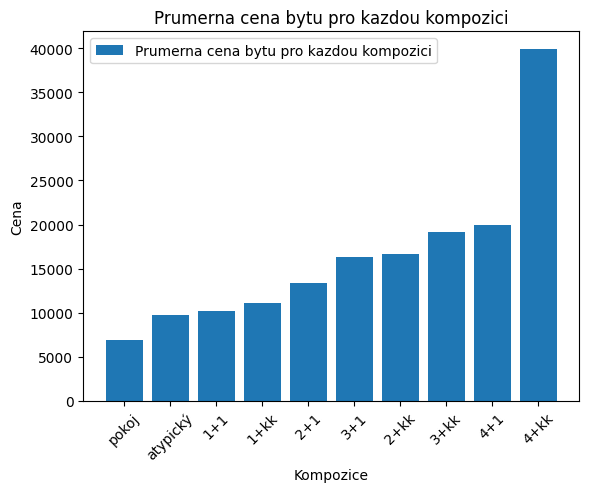

In [87]:
# prumerna cena bytu pro kazdou kompozici + graf

import matplotlib.pyplot as plt

prumerna_cena = df_byty.groupby('Kompozice')['Cena'].mean().round(2).sort_values()

plt.bar(prumerna_cena.index, prumerna_cena.values, label='Prumerna cena bytu pro kazdou kompozici')
plt.title('Prumerna cena bytu pro kazdou kompozici')
plt.xlabel('Kompozice')
plt.ylabel('Cena')
plt.xticks(rotation=45)

plt.legend()
#plt.grid()
plt.show()

In [88]:
# Jaká je průměrná velikost bytu pro každou kompozici?

df_byty.groupby('Kompozice')['Rozmer bez jednotek'].mean().round(2)

Kompozice
1+1          35.07
1+kk         28.88
2+1          56.17
2+kk         59.60
3+1          78.94
3+kk         82.88
4+1          81.00
4+kk        100.00
atypický     27.00
pokoj        37.67
Name: Rozmer bez jednotek, dtype: float64

In [90]:
df_byty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL odkaz            149 non-null    object
 1   Dispozice            149 non-null    object
 2   Rozmery              149 non-null    object
 3   Rozmer bez jednotek  149 non-null    int64 
 4   Kompozice            149 non-null    object
 5   Lokace               149 non-null    object
 6   Ulice                134 non-null    object
 7   Mesto                149 non-null    object
 8   Cena za mesic        149 non-null    object
 9   Cena                 149 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 11.8+ KB


In [91]:
# Existuje ulice, kde je vyšší koncentrace dražších bytů?

prumerna_cena = df_byty['Cena'].mean()
df_vyssi_nez_prum_cena = df_byty.loc[df_byty['Cena']>int(prumerna_cena)]
nejdrazsi_ulice = df_vyssi_nez_prum_cena.groupby('Ulice')['Cena'].count()
nejvic_nejdrazsi_ulice = nejdrazsi_ulice.idxmax()
#print(nejvic_nejdrazsi_ulice)

print(f'Ulice s nejvíce byty s cenou vyšší než průměr je {nejvic_nejdrazsi_ulice}.')


Ulice s nejvíce byty s cenou vyšší než průměr je Zelinova.


In [92]:
# Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

kompozice_ve_meste = df_byty.groupby('Mesto')['Kompozice'].value_counts()

nejcastejsi_kompozice = kompozice_ve_meste.groupby('Mesto').idxmax()

# Výsledek
print(nejcastejsi_kompozice)

Mesto
 Fryšták                                   ( Fryšták, 2+kk)
 Fryšták - Horní Ves           ( Fryšták - Horní Ves, 2+kk)
 Luhačovice                             ( Luhačovice, 2+kk)
 Napajedla                               ( Napajedla, 1+kk)
 Otrokovice                              ( Otrokovice, 2+1)
 Otrokovice - Kvítkovice    ( Otrokovice - Kvítkovice, 2+1)
 Slušovice                                ( Slušovice, 2+1)
 Valašské Klobouky               ( Valašské Klobouky, 2+kk)
 Zlín                                         ( Zlín, 2+kk)
 Zlín - Jaroslavice             ( Zlín - Jaroslavice, 1+kk)
 Zlín - Kostelec                    ( Zlín - Kostelec, 2+1)
 Zlín - Kudlov                        ( Zlín - Kudlov, 2+1)
 Zlín - Louky                         ( Zlín - Louky, 2+kk)
 Zlín - Malenovice               ( Zlín - Malenovice, 1+kk)
 Zlín - Prštné                        ( Zlín - Prštné, 2+1)
 Zlín - Příluky                     ( Zlín - Příluky, 1+kk)
Luhačovice                        

In [93]:
df_byty['Kompozice'].unique()

array(['1+kk', '1+1', '2+kk', '2+1', '3+1', '3+kk', 'atypický', 'pokoj',
       '4+1', '4+kk'], dtype=object)

In [94]:
# Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

df_byty.loc[
    (df_byty['Cena'] > 20000) & 
    (
        (df_byty['Kompozice'] == '2+kk') | 
        (df_byty['Kompozice'] == '1+kk') | 
        (df_byty['Kompozice'] == '2+1') | 
        (df_byty['Kompozice'] == '1+1')
    )
]


,URL odkaz,Dispozice,Rozmery,Rozmer bez jednotek,Kompozice,Lokace,Ulice,Mesto,Cena za mesic,Cena
8,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 96m²,96m²,96,2+kk,"Lešetín I, Zlín",Lešetín I,Zlín,25000Kč/měsíc,25000
18,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 64m²,64m²,64,2+kk,"třída Svobody, Zlín - Malenovice",třída Svobody,Zlín - Malenovice,20690Kč/měsíc,20690
19,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 85m²,85m²,85,2+kk,Luhačovice,NaN,Luhačovice,22000Kč/měsíc,22000
81,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 85m²,85m²,85,2+kk,Luhačovice,NaN,Luhačovice,22000Kč/měsíc,22000
116,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 111m²,111m²,111,2+kk,"Smetanova, Zlín",Smetanova,Zlín,25000Kč/měsíc,25000
131,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 85m²,85m²,85,2+kk,Luhačovice,NaN,Luhačovice,22000Kč/měsíc,22000
139,https://www.sreality.cz/detail/pronajem/byt/2+...,Pronájem bytu 2+kk 120m²,120m²,120,2+kk,"Nádražní, Luhačovice",Nádražní,Luhačovice,23000Kč/měsíc,23000


In [95]:
# Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?

maximalni_cena = df_byty.groupby('Kompozice')['Cena'].max()
print(maximalni_cena)

minimalni_cena = df_byty.groupby('Kompozice')['Cena'].min()
print(minimalni_cena)

rozptyl = maximalni_cena - minimalni_cena
print(rozptyl)

nejvetsi_rozptyl = rozptyl[rozptyl == rozptyl.max()]
print(f'Nejvetsi rozptyl maji: {nejvetsi_rozptyl}.')

Kompozice
1+1         13500
1+kk        14900
2+1         16500
2+kk        25000
3+1         19000
3+kk        29000
4+1         21000
4+kk        39900
atypický    12000
pokoj       10500
Name: Cena, dtype: int64
Kompozice
1+1          4200
1+kk         6500
2+1          9000
2+kk         9000
3+1         11900
3+kk        13000
4+1         19000
4+kk        39900
atypický     7500
pokoj        3708
Name: Cena, dtype: int64
Kompozice
1+1          9300
1+kk         8400
2+1          7500
2+kk        16000
3+1          7100
3+kk        16000
4+1          2000
4+kk            0
atypický     4500
pokoj        6792
Name: Cena, dtype: int64
Nejvetsi rozptyl maji: Kompozice
2+kk    16000
3+kk    16000
Name: Cena, dtype: int64.
